## Train a model with linear data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance

In [38]:
# Install xgboost in notebook instance.
#### Command to install xgboost
# !conda install -y -c conda-forge xgboost

In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
df = pd.read_csv('linear_all.csv')

In [4]:
df.head()

,x,y,y_noisy
0,4.439863,30.199317,27.659911
1,17.414646,95.073231,102.635654
2,4.134383,28.671916,24.974757
3,18.372218,99.861091,102.041951
4,9.768224,56.841119,56.978985


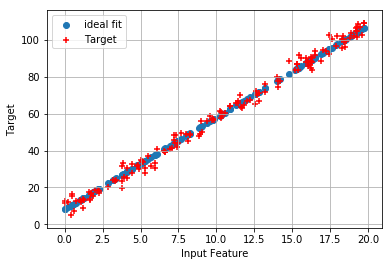

In [5]:
plt.scatter(x=df.x,y=df.y,label='ideal fit')
plt.scatter(x=df.x,y=df.y_noisy, color='r',marker='+',label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()

In [6]:
train_file = 'linear_train.csv'
validation_file = 'linear_validation.csv'

In [7]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=['y_noisy','x'])
df_validation = pd.read_csv(validation_file,names=['y_noisy','x'])

In [8]:
df_train.head()

,y_noisy,x
0,88.563247,16.871099
1,13.212976,1.268020
2,60.304166,10.534351
3,92.380046,17.409662
4,102.040835,19.072610


In [9]:
df_validation.head()

,y_noisy,x
0,12.879772,0.710181
1,88.557926,14.768806
2,99.765246,18.533652
3,86.486503,16.155549
4,99.099132,18.429411


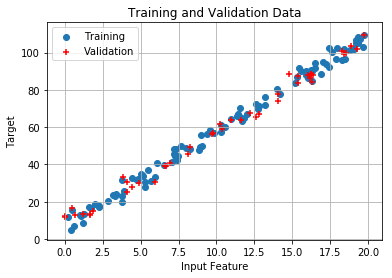

In [10]:
plt.scatter(x=df_train.x,y=df_train.y_noisy,label='Training')
plt.scatter(x=df_validation.x,y=df_validation.y_noisy, color='r',marker='+',label='Validation')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Training and Validation Data')
plt.legend()

In [11]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [12]:
# max_depth = 5,objective="reg:linear",num_round = 50
regressor = xgb.XGBRegressor()

In [13]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:59.9154	validation_1-rmse:58.6815
[1]	validation_0-rmse:54.199	validation_1-rmse:52.8974
[2]	validation_0-rmse:49.0326	validation_1-rmse:47.5879
[3]	validation_0-rmse:44.3695	validation_1-rmse:42.9155
[4]	validation_0-rmse:40.1549	validation_1-rmse:38.633
[5]	validation_0-rmse:36.3543	validation_1-rmse:34.8554
[6]	validation_0-rmse:32.9178	validation_1-rmse:31.3881
[7]	validation_0-rmse:29.811	validation_1-rmse:28.363
[8]	validation_0-rmse:27.0065	validation_1-rmse:25.689
[9]	validation_0-rmse:24.4668	validation_1-rmse:23.2019
[10]	validation_0-rmse:22.1778	validation_1-rmse:20.9532
[11]	validation_0-rmse:20.0954	validation_1-rmse:18.8611
[12]	validation_0-rmse:18.2253	validation_1-rmse:17.0583
[13]	validation_0-rmse:16.5299	validation_1-rmse:15.4002
[14]	validation_0-rmse:15.0003	validation_1-rmse:13.8925
[15]	validation_0-rmse:13.6189	validation_1-rmse:12.5316
[16]	validation_0-rmse:12.3733	validation_1-rmse:11.3235
[17]	validation_0-rmse:11.25	validation_1-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
eval_result = regressor.evals_result()

In [16]:
eval_result

{'validation_0': {'rmse': [59.91539,
   54.198971,
   49.032558,
   44.36945,
   40.154881,
   36.354263,
   32.917763,
   29.811041,
   27.00647,
   24.466795,
   22.177771,
   20.09539,
   18.225262,
   16.529873,
   15.000331,
   13.618901,
   12.373326,
   11.249956,
   10.233866,
   9.318343,
   8.493932,
   7.750203,
   7.08306,
   6.482958,
   5.944533,
   5.461228,
   5.029148,
   4.644796,
   4.300961,
   3.996599,
   3.726644,
   3.489061,
   3.280589,
   3.095958,
   2.932368,
   2.792294,
   2.668564,
   2.564667,
   2.471993,
   2.391735,
   2.324584,
   2.265652,
   2.211031,
   2.167151,
   2.124197,
   2.089766,
   2.056503,
   2.028913,
   2.004578,
   1.981877,
   1.958192,
   1.943447,
   1.92439,
   1.905876,
   1.893058,
   1.874805,
   1.861881,
   1.849355,
   1.833931,
   1.827931,
   1.808806,
   1.80372,
   1.799252,
   1.795322,
   1.779727,
   1.771783,
   1.762211,
   1.753605,
   1.745494,
   1.73795,
   1.735292,
   1.73009,
   1.727898,
   1.712081,
   1

In [17]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [18]:
print(training_rounds)

range(0, 100)


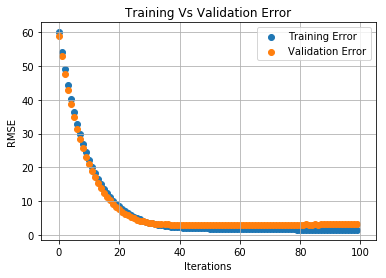

In [19]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

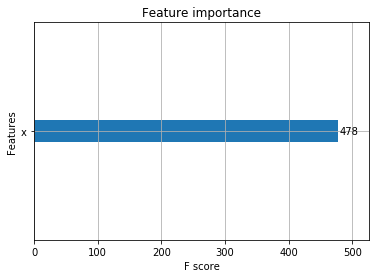

In [20]:
xgb.plot_importance(regressor)

In [21]:
df.head()

,x,y,y_noisy
0,4.439863,30.199317,27.659911
1,17.414646,95.073231,102.635654
2,4.134383,28.671916,24.974757
3,18.372218,99.861091,102.041951
4,9.768224,56.841119,56.978985


In [22]:
X_test = df.iloc[:,:1]
print(X_test[:5])

           x
0   4.439863
1  17.414646
2   4.134383
3  18.372218
4   9.768224


In [23]:
# This works
type(X_test)

pandas.core.frame.DataFrame

In [24]:
# This does not work
type(df.iloc[:5,0])

pandas.core.series.Series

In [25]:
result = regressor.predict(X_test)

In [26]:
result[:5]

array([32.158833, 99.79756 , 25.818325, 99.5197  , 57.693382],
      dtype=float32)

In [27]:
df['y_predicted'] = result

In [28]:
df.head()

,x,y,y_noisy,y_predicted
0,4.439863,30.199317,27.659911,32.158833
1,17.414646,95.073231,102.635654,99.797562
2,4.134383,28.671916,24.974757,25.818325
3,18.372218,99.861091,102.041951,99.519699
4,9.768224,56.841119,56.978985,57.693382


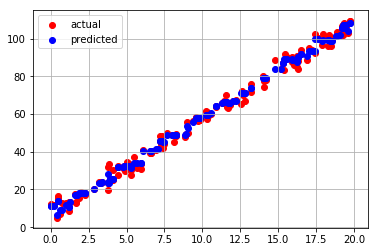

In [29]:
plt.scatter(x=df.x,y=df.y_noisy,color='r',label='actual')
plt.scatter(x=df.x,y=df.y_predicted,color='b',label='predicted')
plt.grid(True)
plt.legend()

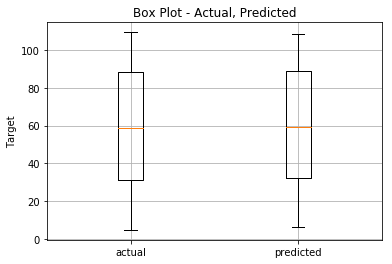

In [30]:
plt.boxplot([df.y_noisy,df.y_predicted], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

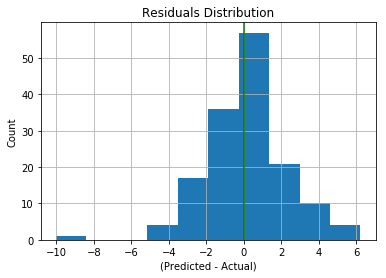

In [31]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df.y_predicted - df.y_noisy)

plt.hist(residuals)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='g')


### Tree Based Algorithms cap the upper and lower values that are predicted.

In [32]:
# True Function
def straight_line(x):
    return 5*x + 8

In [33]:
# X is outside range of training samples
X = np.array([1000,25,-100,5000])
tmp_df = pd.DataFrame({'x':X})

In [34]:
print("True Function:\n{0}".format(straight_line(X)))
print("Predicted:\n{0}".format(regressor.predict(tmp_df)))

True Function:
[ 5008   133  -492 25008]
Predicted:
[108.23764  108.23764   10.979865 108.23764 ]


In [35]:
# X is inside range of training samples
X = np.array([0,1,3,5,7,9,11,15,18])
tmp_df = pd.DataFrame({'x':X})

In [36]:
print("True Function:\n{0}".format(straight_line(X)))
print("Predicted:\n{0}".format(regressor.predict(tmp_df)))

True Function:
[ 8 13 23 33 43 53 63 83 98]
Predicted:
[10.979865 11.920725 20.232351 32.694294 41.305157 53.531315 64.285965
 83.82669  99.538284]


In [37]:
df.describe()

,x,y,y_noisy,y_predicted
count,150.000000,150.000000,150.000000,150.000000
mean,10.155632,58.778159,58.639605,58.834286
std,6.137159,30.685793,31.214842,31.252228
min,0.032843,8.164217,4.927482,6.500861
25%,4.853069,32.265347,31.431020,32.158833
50%,10.250928,59.254638,58.780872,59.385063
75%,16.044461,88.222305,88.217169,88.770012
max,19.712488,106.562440,109.311361,108.237640
